In [1]:
import random
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from wordcloud import WordCloud

import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_pickle('../data/cleaned_tweets.pkl')

In [3]:
df = df[df['region'] == 'united states']

In [4]:
# choosing a subset of tweets that have more/equal than 10 and less/equal than 20 words

df = df[(df.num_words>=10) & (df.num_words<=20)]
df.category.value_counts()

unreliable    278
true          208
Name: category, dtype: int64

In [5]:
# sub sample only n tweets from each category
n = 200
df = pd.concat([df[df.category == 'unreliable'].sample(n=n, random_state=42),
                df[df.category == 'true'].sample(n=n, random_state=42)]).reset_index(drop=True)

In [6]:
df.head()

,text,region,category,label,cleaned,num_words
0,"10,000 deaths in virus outbreak in michigan, w...",united states,unreliable,0,death virus outbreak michigan washington idaho...,10
1,says michigan covid-19 order bans gardening an...,united states,unreliable,0,say michigan covid order ban gardening sale ve...,10
2,harvard professor charles lieber was arrested ...,united states,unreliable,0,harvard professor charles lieber arrested manu...,10
3,"valley county, montana, mandated pink arm band...",united states,unreliable,0,valley county montana mandated pink arm band r...,11
4,"ohio gov. mike dewine released 4,300 prisoners...",united states,unreliable,0,ohio gov mike dewine released prisoner warning...,11


In [7]:
bow = []
for word in df.cleaned.str.split().to_list():
    bow += word

In [8]:
len(bow)

5388

In [9]:
bow_true = []
for word in df[df.category == 'true'].cleaned.str.split().to_list():
    bow_true += word


In [10]:
bow_unreliable = []
for word in df[df.category == 'unreliable'].cleaned.str.split().to_list():
    bow_unreliable += word

In [11]:
len(bow_true)

2811

In [12]:
len(bow_unreliable)

2577

#### most common words in each category

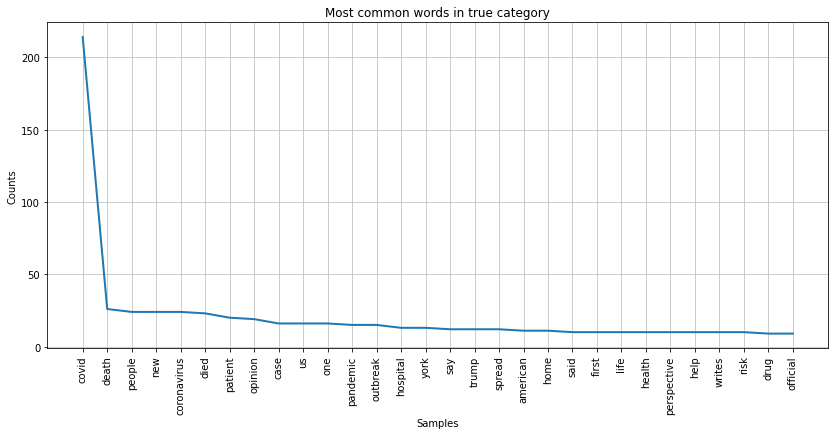

In [13]:
plt.figure(figsize=(14,6))
nltk.FreqDist(bow_true).plot(30,
                             title='Most common words in true category')
plt.show()

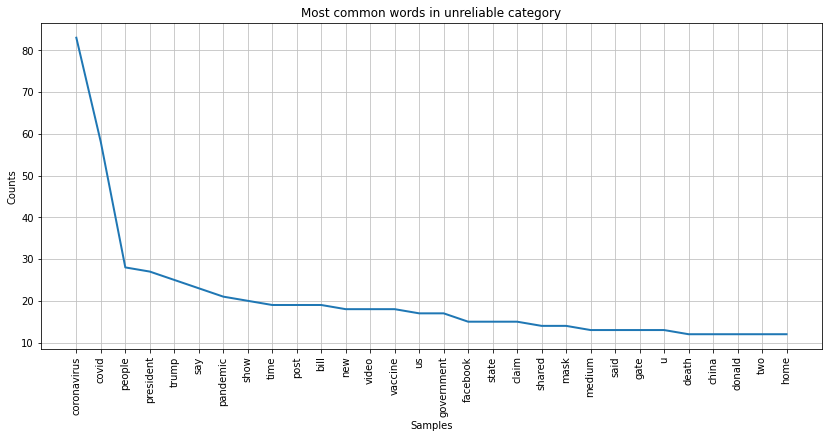

In [14]:
plt.figure(figsize=(14,6))
nltk.FreqDist(bow_unreliable).plot(30,
                             title='Most common words in unreliable category')
plt.show()

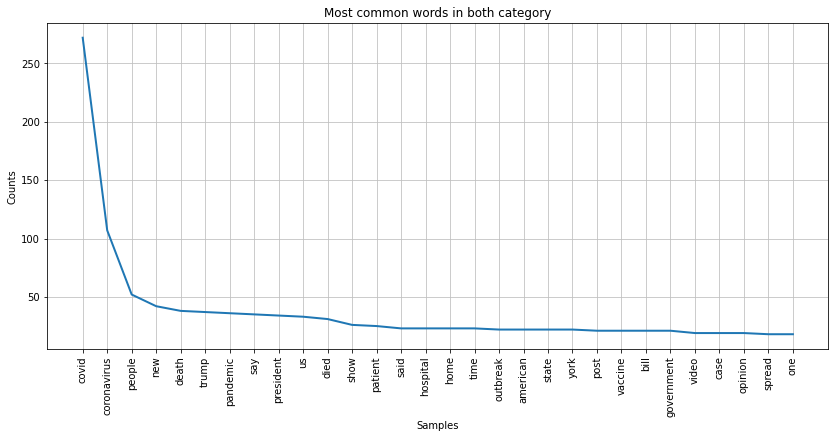

In [15]:
plt.figure(figsize=(14,6))
nltk.FreqDist(bow).plot(30,
                             title='Most common words in both category')
plt.show()

#### size of vocabulary (distinct words)

In [16]:
len(set(bow_true))

1397

In [17]:
len(set(bow_unreliable))

1184

In [18]:
len(set(bow_true) & set(bow_unreliable))

437

In [19]:
common_n_words = [i[0] for i in nltk.FreqDist(bow).most_common(n)]

In [20]:
common_n_words[:10]

['covid',
 'coronavirus',
 'people',
 'new',
 'death',
 'trump',
 'pandemic',
 'say',
 'president',
 'us']

In [21]:
common_true_words = [i[0] for i in nltk.FreqDist(bow_true).most_common(n+2)]
common_unreliable_words = [i[0] for i in nltk.FreqDist(bow_unreliable).most_common(n+2)]

In [22]:
true_tweets = [tweet for tweet in df[df.category == 'true'].cleaned.str.split().to_list()]
unreliable_tweets = [tweet for tweet in df[df.category == 'unreliable'].cleaned.str.split().to_list()]

In [23]:
def matrix_creator(tweets, words):
    word_tweet = {word:np.zeros(len(tweets)) for word in words}
    for word in words:
        for i, tweet in enumerate(tweets):
            if word in tweet:
                word_tweet[word][i] += 1
    df = pd.DataFrame(word_tweet).T
    df.columns = ['t'+str(col) for col in df.columns.to_list()]
    df = df.reset_index().rename(columns={'index':'word'})
    return df
        

In [24]:
word_tweet_true_df = matrix_creator(true_tweets, common_true_words)
word_tweet_unreliable_df = matrix_creator(unreliable_tweets, common_unreliable_words)

In [25]:
word_tweet_true_df = word_tweet_true_df[(word_tweet_true_df.word != 'covid') & (word_tweet_true_df.word != 'coronavirus')].reset_index(drop=True)
word_tweet_unreliable_df = word_tweet_unreliable_df[(word_tweet_unreliable_df.word != 'covid') & (word_tweet_unreliable_df.word != 'coronavirus')].reset_index(drop=True)

In [26]:
word_tweet_true_df.iloc[:,1:] = word_tweet_true_df.select_dtypes('float64').astype('int8')
word_tweet_unreliable_df.iloc[:,1:] = word_tweet_unreliable_df.select_dtypes('float64').astype('int8')

In [27]:
word_tweet_true_df.to_csv('../../ITEC-623/R/ITEC-623/final_project/data/true_word_tweet_matrix.csv', index=False)
word_tweet_unreliable_df.to_csv('../../ITEC-623/R/ITEC-623/final_project/data/false_word_tweet_matrix.csv', index=False)

In [65]:
from nltk.stem import WordNetLemmatizer

# lemmatization only
lemmatizer = WordNetLemmatizer()


In [85]:

# preview
lemmatizer.lemmatize('dies')

'dy'